<a href="https://colab.research.google.com/github/Aniketkindre47/WebscrappingFortProject/blob/BugfixbyColab/WebscrapingForts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import urllib.parse
import urllib.request
import matplotlib.pyplot as plt
import numpy as np



In [21]:
#url = 'https://www.treksandtrails.org/blog/treksandtrails-list-of-forts-of-maharashtra/'
#response = requests.get(url)

soup = BeautifulSoup(html, 'html.parser')

rows= soup.find("div", class_= "custom-html-widget").findAll("table")

rows
#print(soup.find_all('table'))
soup.findAll('table')[0].findAll('tr')[1].findAll('td')[0]

df=pd.DataFrame(columns=['Region', 'Name','Height'])

x=0
i=0
for i in range(24):
  region=soup.findAll('table')[i].findAll('tr')[1].findAll('td')[0].text
  x=len(soup.find_all('table')[i].findAll('tr'))

  for j in range(x):
    if j==0:
      pass
    else:
      soup.findAll('table')[i].findAll('tr')[j]
      df.loc[len(df.index)] = [region, soup.find_all('table')[i].findAll('tr')[j].findAll('td')[2].text,soup.find_all('table')[i].findAll('tr')[j].findAll('td')[3].text.replace('\'','')]
df

NameError: name 'html' is not defined

In [ ]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df = df.dropna(subset=['Height'])
df

,Region,Name,Height
0,BAGLAN,Mangi-Tungi,3136.0
1,BAGLAN,Nhavi/Ratangad,4110.0
2,BAGLAN,Mulher Fort,4284.0
3,BAGLAN,Hargad Fort,4460.0
4,BAGLAN,Salher Fort,5140.0
...,...,...,...
173,ROHA,Birwadi,1799.0
174,ROHA,Songiri,1000.0
175,MANDANGAD,Sagargad Fort,1357.0
176,MANDANGAD,Mandangad,1606.0


In [ ]:
df1 = df.sort_values(by=["Height"])
df1

,Region,Name,Height
167,KARJAT,Sankshi Fort,800.0
169,ROHA,Avchitgad,977.0
7,DHULE,Songir fort,997.0
174,ROHA,Songiri,1000.0
171,ROHA,Tala Fort,1000.0
...,...,...,...
48,IGATPURI,Mandan***,4841.0
49,IGATPURI,Alang***,4852.0
5,BAGLAN,Salota Fort,4986.0
4,BAGLAN,Salher Fort,5140.0


In [ ]:
df1.to_csv("TrekHeight.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ddf=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TrekHeight.csv')
ddf

,Region,Name,Height
0,KARJAT,Sankshi Fort,800
1,ROHA,Avchitgad,977
2,DHULE,Songir fort,997
3,ROHA,Songiri,1000
4,ROHA,Tala Fort,1000
...,...,...,...
158,IGATPURI,Mandan***,4841
159,IGATPURI,Alang***,4852
160,BAGLAN,Salota Fort,4986
161,BAGLAN,Salher Fort,5140


In [ ]:
ddf['Name'] = ddf['Name'].astype('str')
ddf['Name'] = ddf['Name'].str.replace('***','')
ddf

,Region,Name,Height
0,KARJAT,Sankshi Fort,800
1,ROHA,Avchitgad,977
2,DHULE,Songir fort,997
3,ROHA,Songiri,1000
4,ROHA,Tala Fort,1000
...,...,...,...
158,IGATPURI,Mandan,4841
159,IGATPURI,Alang,4852
160,BAGLAN,Salota Fort,4986
161,BAGLAN,Salher Fort,5140


In [ ]:
#pip install Flask-Googletrans

In [ ]:
#pip install googletrans==3.1.0a0

In [ ]:
# prompt: convert name row of ddf column to marathi using googletrans

from googletrans import Translator
import pandas as pd

# Create a translator object
translator = Translator()

# Get the Marathi translation of each name in the 'Name' column
ddf['Name_marathi'] = ddf['Name'].apply(lambda x: translator.translate(x, dest='mr').text)

# Print the updated DataFrame
print(ddf)


       Region            Name  Height        Name_marathi
0      KARJAT   Sankshi Fort      800      सांक्षी किल्ला
1        ROHA       Avchitgad     977             अवचितगड
2       DHULE     Songir fort     997  मोठ्याने विचार करा
3        ROHA         Songiri    1000             धन्यवाद
4        ROHA      Tala Fort     1000         किल्ला बोला
..        ...             ...     ...                 ...
158  IGATPURI          Mandan    4841                मंडण
159  IGATPURI           Alang    4852               विचार
160    BAGLAN     Salota Fort    4986       सालोटा किल्ला
161    BAGLAN     Salher Fort    5140      साल्हेर किल्ला
162    JUNNAR   Kalsubai Trek    5400       कळसूबाई ट्रेक

[163 rows x 4 columns]


In [4]:

ddf = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/naav.xlsx")
data = ddf.set_index('Name_marathi').to_dict()['Height']
print(data)

{' सांक्षी किल्ला': 800, 'अवचितगड': 977, 'सोनगीर किल्ला': 997, 'सोनगिरी': 1000, ' तळाचा किल्ला': 1000, ' सोंडाई किल्ला': 1200, 'इर्शाळगड किल्ला': 1213, ' घोसाळगड वीरगड': 1222, ' सागरगड किल्ला': 1357, 'सरसगड किल्ला': 1433, 'सुरगड किल्ला': 1507, 'तांदुळवाडी': 1524, ' कर्नाळा किल्ला': 1538, 'पेठ किल्ला - कोथळीगड किल्ला': 1550, 'कालदुर्ग': 1550, ' पेब किल्ला - विकटगड': 1564, 'भूपतगड': 1603, 'मंडणगड': 1606, 'अशेरीगड किल्ला': 1680, 'रसाळगड': 1767, 'बिरवाडी': 1799, 'अडसूळ': 1826, ' माणिकगड किल्ला': 1876, 'कोहोज किल्ला': 1889, 'लालींग किल्ला': 1945, 'गलना किल्ला': 1968, 'कलानंदीगड, पारगड': 2000, 'पदर किल्ला': 2002, 'तुंगी': 2019, 'कुर्डुगड': 2021, ' सुधागड किल्ला - भोरपगड': 2030, 'गोरखगड किल्ला': 2137, 'कवल्या': 2124, 'पालगड/पालदुर्गा': 2160, 'हरगापूरगड': 2250, 'गंभीरगड': 2252, 'चंद्रगड किल्ला - ढवळ्या - आर्थर सीट ट्रेल': 2257, 'कलावंतीण दुर्ग किल्ला': 2318, 'प्रबळगड किल्ला': 2318, 'ढाक बहिरी लेणी - भीमगड': 2320, 'भामेर किल्ला': 2443, 'मनसंतोष': 2460, 'मंगळगड/कांगोरी': 2465, 'कंक्राळा किल्ला':

In [5]:
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"

r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"

with open(font_path, "wb") as fw:
  fw.write(r.content)


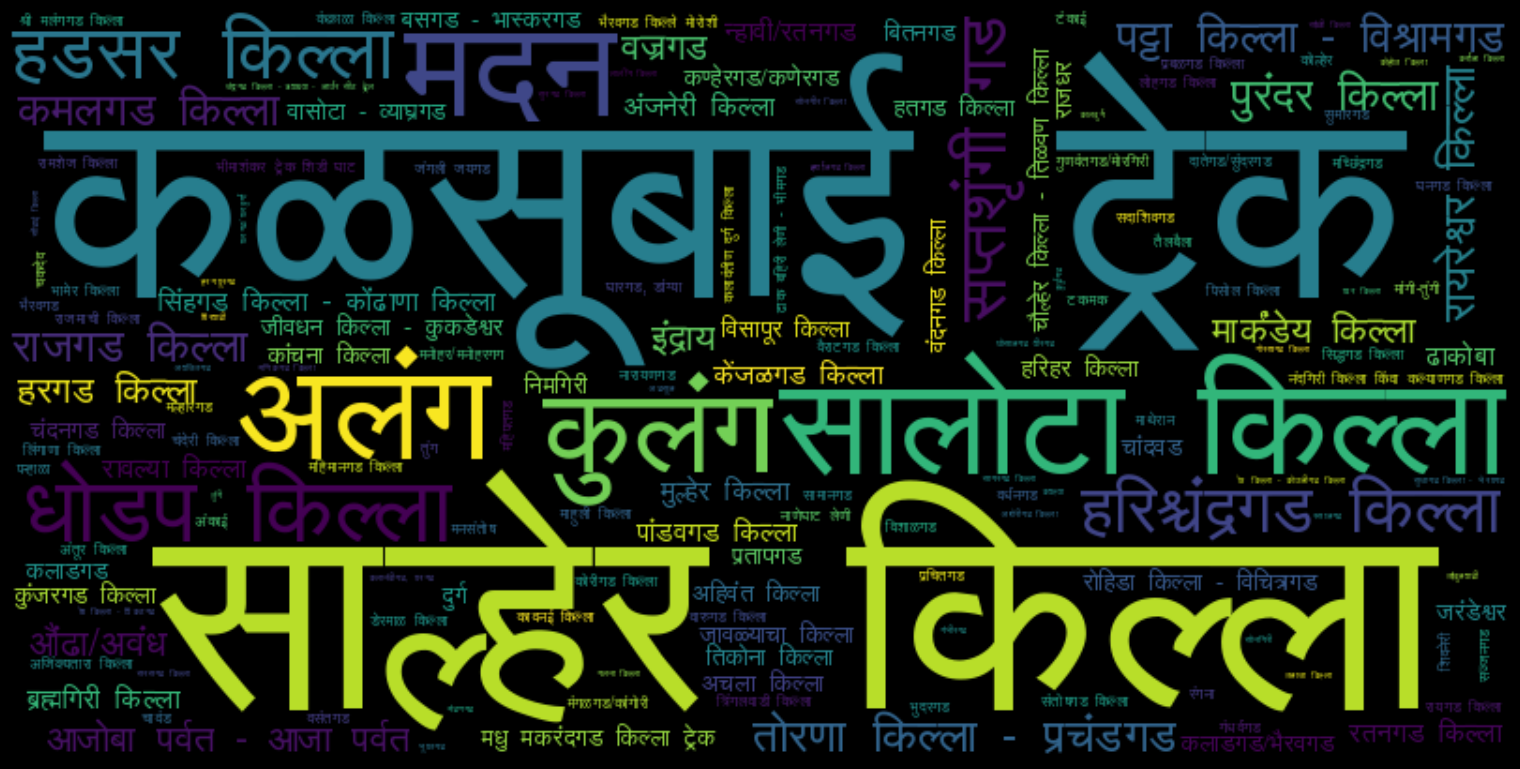

In [6]:
data = ddf.set_index('Name_marathi').to_dict()['Height']

wc = WordCloud(width=800, height=400, max_words=400, font_path=font_path).generate_from_frequencies(data)
plt.figure(figsize=(15,13), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.show()
#https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

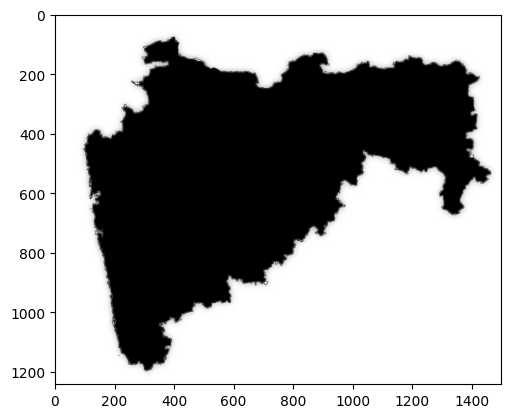

In [7]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
mht=np.array(Image.open(r'/content/drive/MyDrive/Colab Notebooks/maharashtra-outline-map1.jpg'))
img = Image.fromarray(mht)
img
plt.imshow(mht,interpolation='bilinear')

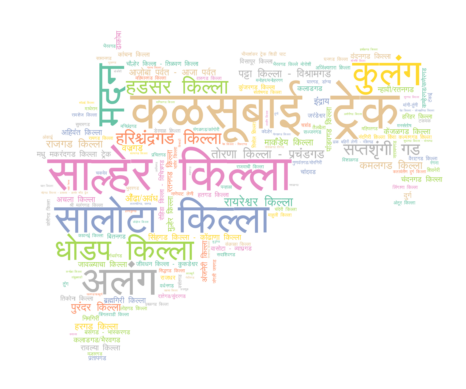

In [15]:
wc = WordCloud(font_path=font_path, max_words=200,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='white', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('my_fig125.png', dpi=4600)

In [17]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

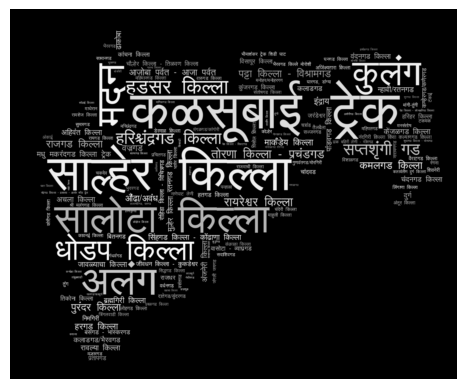

In [20]:
wc = WordCloud(font_path=font_path, max_words=200,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='black', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.savefig('my_fig1.png', dpi=5600)